In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = {'ride_id': [2901, 2902, 2903, 2904, 2905, 2906, 2907],
        'pickup_time': ['2025-07-29 06:10', '2025-07-29 07:30', '2025-07-29 08:30', np.nan, '2025-07-29 09:05', '2025-07-29 10:50', '2025-07-29 12:20'],
        'dropoff_time': ['2025-07-29 06:25', '2025-07-29 08:15', '2025-07-29 09:00', '2025-07-29 09:45', np.nan, '2025-07-29 11:10', '2025-07-29 12:50'],
        'distance_km': [3.5, 8.1, 7.3, 10.5, 9.0, 10.0, 6.7],
        'fare': [8500, 22000, 4500, np.nan, 8000, 200000, 9500],
        'payment_type': ['Credit Card', 'Debit Card', 'Credit Card', 'Credit Card', 'Debit Card', 'Credit Card', 'Credit Card']}

df = pd.DataFrame(data)
df['pickup_time'] = pd.to_datetime(df['pickup_time'], errors='coerce')
df['dropoff_time'] = pd.to_datetime(df['dropoff_time'], errors='coerce')

print(df)

   ride_id         pickup_time        dropoff_time  distance_km      fare  \
0     2901 2025-07-29 06:10:00 2025-07-29 06:25:00          3.5    8500.0   
1     2902 2025-07-29 07:30:00 2025-07-29 08:15:00          8.1   22000.0   
2     2903 2025-07-29 08:30:00 2025-07-29 09:00:00          7.3    4500.0   
3     2904                 NaT 2025-07-29 09:45:00         10.5       NaN   
4     2905 2025-07-29 09:05:00                 NaT          9.0    8000.0   
5     2906 2025-07-29 10:50:00 2025-07-29 11:10:00         10.0  200000.0   
6     2907 2025-07-29 12:20:00 2025-07-29 12:50:00          6.7    9500.0   

  payment_type  
0  Credit Card  
1   Debit Card  
2  Credit Card  
3  Credit Card  
4   Debit Card  
5  Credit Card  
6  Credit Card  


In [6]:
print("결측치 비울: \n", df.isna().mean().round(2)*100)

결측치 비울: 
 ride_id          0.0
pickup_time     14.0
dropoff_time    14.0
distance_km      0.0
fare            14.0
payment_type     0.0
dtype: float64


결측치 비울: 
 ride_id          0.0
pickup_time     14.0
dropoff_time    14.0
distance_km      0.0
fare            14.0
payment_type     0.0
dtype: float64
   ride_id         pickup_time        dropoff_time  trip_duration_min  \
0     2901 2025-07-29 06:10:00 2025-07-29 06:25:00               15.0   
1     2902 2025-07-29 07:30:00 2025-07-29 08:15:00               45.0   
2     2903 2025-07-29 08:30:00 2025-07-29 09:00:00               30.0   
6     2907 2025-07-29 12:20:00 2025-07-29 12:50:00               30.0   

   distance_km     fare payment_type  
0          3.5   8500.0         Card  
1          8.1  22000.0         Card  
2          7.3   4500.0         Card  
6          6.7   9500.0         Card  


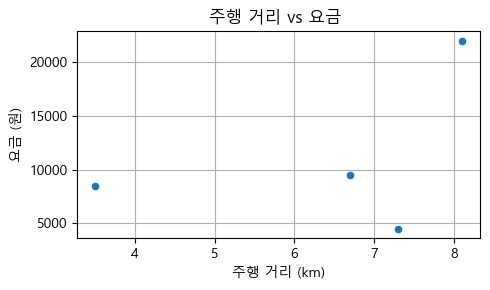

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

data = {'ride_id': [2901, 2902, 2903, 2904, 2905, 2906, 2907],
        'pickup_time': ['2025-07-29 06:10', '2025-07-29 07:30', '2025-07-29 08:30', np.nan, '2025-07-29 09:05', '2025-07-29 10:50', '2025-07-29 12:20'],
        'dropoff_time': ['2025-07-29 06:25', '2025-07-29 08:15', '2025-07-29 09:00', '2025-07-29 09:45', np.nan, '2025-07-29 11:10', '2025-07-29 12:50'],
        'distance_km': [3.5, 8.1, 7.3, 10.5, 9.0, 10.0, 6.7],
        'fare': [8500, 22000, 4500, np.nan, 8000, 200000, 9500],
        'payment_type': ['Credit Card', 'Debit Card', 'Credit Card', 'Credit Card', 'Debit Card', 'Credit Card', 'Credit Card']}

df = pd.DataFrame(data)
df['pickup_time'] = pd.to_datetime(df['pickup_time'], errors='coerce')
df['dropoff_time'] = pd.to_datetime(df['dropoff_time'], errors='coerce')

print("결측치 비울: \n", df.isna().mean().round(2)*100)
df['fare'] = df['fare'].fillna(df['fare'].median())
df = df.dropna(subset=['pickup_time', 'dropoff_time'])

df['trip_duration_min'] = (df['dropoff_time']-df['pickup_time']).dt.total_seconds()/60

df = df[(df['distance_km'] < 100) & (df['fare'] < 100000)]

df['payment_type'] = df['payment_type'].replace({'Credit Card':'Card', 'Debit Card' : 'Card'}) 

df_cleaned = df[['ride_id', 'pickup_time', 'dropoff_time', 'trip_duration_min', 'distance_km', 'fare', 'payment_type']]
print(df_cleaned)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(5, 3))
sns.scatterplot(data=df_cleaned, x='distance_km',y='fare')          
plt.title('주행 거리 vs 요금 ')
plt.xlabel('주행 거리 (km)')
plt.ylabel('요금 (원)')
plt.grid(True)
plt.tight_layout()
plt.show()